In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 1000)

In [5]:
url = 'https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures'

In [6]:
epl_list = []

In [8]:
epl_list.append(pd.read_html(url,index_col=False,flavor='lxml')[0])

In [9]:
epl_list = pd.concat(epl_list, axis=0, ignore_index=True)

In [12]:
epl_df = epl_list[epl_list['Wk'].notna()]

In [14]:
epl_df = epl_df.rename(columns={'xG':'xGHome'
                   ,'xG.1':'xGAway'})

In [20]:
print(epl_df.columns.tolist())

['Wk', 'Day', 'Date', 'Time', 'Home', 'xGHome', 'Score', 'xGAway', 'Away', 'Attendance', 'Venue', 'Referee', 'HomeScore', 'AwayScore']


In [16]:
epl_df['HomeScore'] = epl_df['Score'].str[0]
epl_df['AwayScore'] = epl_df['Score'].str[2]

In [19]:
epl_df = epl_df.drop(['Match Report','Notes'],axis=1)

In [21]:
epl_df['Date'] = pd.to_datetime(epl_df['Date'])

In [ ]:
print(epl_df.head(5))

In [23]:
epl_df.sort_values(by='Date', inplace=True)

In [24]:
epl_df = epl_df[['Wk','Day','Date','Time','Home','HomeScore','xGHome','AwayScore','xGAway','Away','Attendance','Venue','Referee']]

In [25]:
epl_df = epl_df.dropna()

In [27]:
epl_df = epl_df[['Date','Home','HomeScore','xGHome','AwayScore','xGAway','Away']].reset_index(drop=True)

In [ ]:
epl_df

In [29]:
league_Mean_Home_xG = round((epl_df['xGHome'].mean()),2)
league_Mean_Away_xG = round((epl_df['xGAway'].mean()),2)

In [ ]:
print(f'The mean home expected goals is {league_Mean_Home_xG}')
print(f'The mean away expected goals is {league_Mean_Away_xG}')

In [31]:
home_team_xg_strength_offense = epl_df.groupby('Home').agg({'xGHome': 'sum', 'Home': ['count', 'first']})

In [ ]:
home_team_xg_strength_offense

In [36]:
home_team_xg_strength_offense.columns = ['xGHome', 'TotalGames', 'Home']

In [38]:
home_team_xg_strength_offense['xGHome_offense_rating'] = (home_team_xg_strength_offense['xGHome'] / home_team_xg_strength_offense['TotalGames']) / league_Mean_Home_xG

In [40]:
home_team_xg_strength_offense = home_team_xg_strength_offense.reset_index(drop = True)

In [42]:
home_team_xg_strength_offense = pd.DataFrame(home_team_xg_strength_offense)

In [43]:
home_team_xg_strength_offense.columns = ['xGHome', 'TotalGames','Home','xGHome_offense_rating']

In [45]:
home_team_xg_strength_offense = home_team_xg_strength_offense[['Home','xGHome','TotalGames','xGHome_offense_rating']]

In [ ]:
home_team_xg_strength_offense.sort_values('xGHome_offense_rating', ascending=False)

In [49]:
away_team_xg_strength_offense = epl_df.groupby('Away').agg({'xGAway':'sum', 'Away':['count','first']})

In [50]:
away_team_xg_strength_offense.columns = ['xGAway','TotalGames','Away']

In [53]:
away_team_xg_strength_offense['xGAway_offense_rating'] = (away_team_xg_strength_offense['xGAway']/away_team_xg_strength_offense['TotalGames'])/league_Mean_Away_xG

In [ ]:
away_team_xg_strength_offense

In [56]:
away_team_xg_strength_offense = away_team_xg_strength_offense.reset_index(drop = True)

In [60]:
away_team_xg_strength_offense = pd.DataFrame(away_team_xg_strength_offense)

In [ ]:
away_team_xg_strength_offense.sort_values('xGAway_offense_rating',ascending=False)

In [66]:
home_team_xg_strength_defense = epl_df.groupby('Home').agg({'xGAway': 'sum', 'Home': ['count', 'first']})

In [ ]:
home_team_xg_strength_defense

In [68]:
home_team_xg_strength_defense.columns = ['xGAway', 'TotalGames', 'Home']

In [70]:
home_team_xg_strength_defense['xGHome_defense_rating'] = (home_team_xg_strength_defense['xGAway'] / home_team_xg_strength_defense['TotalGames']) / league_Mean_Away_xG

In [71]:
home_team_xg_strength_defense = home_team_xg_strength_defense.reset_index(drop = True)

In [ ]:
home_team_xg_strength_defense.sort_values('xGHome_defense_rating')

In [78]:
home_team_xg_strength_defense = home_team_xg_strength_defense.rename(columns={'xGAway':'xG_Conceded_at_Home'})

In [81]:
away_team_xg_strength_defense = epl_df.groupby('Away').agg({'xGHome': 'sum', 'Away': ['count', 'first']})

In [ ]:
away_team_xg_strength_defense

In [83]:
away_team_xg_strength_defense.columns = ['xG_Conceded_at_Away', 'TotalGames', 'Away']

In [84]:
away_team_xg_strength_defense['xGAway_defense_rating'] = (away_team_xg_strength_defense['xG_Conceded_at_Away'] / away_team_xg_strength_defense['TotalGames']) / league_Mean_Home_xG

In [85]:
away_team_xg_strength_defense = away_team_xg_strength_defense.reset_index(drop = True)

In [ ]:
away_team_xg_strength_defense.sort_values('xGAway_defense_rating')

In [93]:
chelsea_home_offense_rating = 0.916056
liverpool_away_defense_rating = 1.019320

chelsea_home_expected_xg = (chelsea_home_offense_rating * liverpool_away_defense_rating) * league_Mean_Home_xG

liverpool_away_offense_rating = 1.332498
chelsea_home_defense_rating = 0.981621

liverpool_away_expected_xg = (liverpool_away_offense_rating * chelsea_home_defense_rating) * league_Mean_Away_xG

In [94]:
chelsea_home_expected_xg

1.4753316390336002

In [95]:
liverpool_away_expected_xg

1.64809010426508

Poisson Distribution to calculate the probabilites of the match result


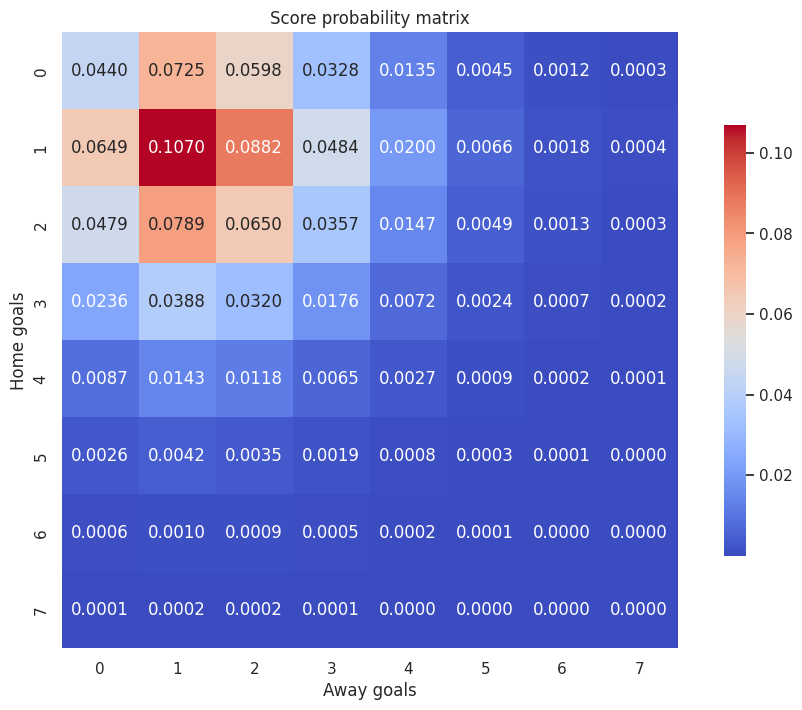

In [113]:
import numpy as np
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt

home_expectancy = chelsea_home_expected_xg
away_expectancy = liverpool_away_expected_xg


max_score = 7
score_range = np.arange(0, max_score+1)

home_pmf = poisson.pmf(score_range, home_expectancy)
away_pmf = poisson.pmf(score_range, away_expectancy)

# calculate the outer product of the home and away PMFs
score_prob_matrix = np.outer(home_pmf, away_pmf)

# reshape the matrix into a square matrix of score probabilities
score_prob_matrix = score_prob_matrix.reshape(max_score+1, max_score+1)


# set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# create a heatmap using seaborn
sns.set()
sns.heatmap(score_prob_matrix, cmap="coolwarm", annot=True, fmt=".4f", square=True, cbar_kws={"shrink": 0.7}, ax=ax)

# set the axis labels and title
plt.xlabel("Away goals")
plt.ylabel("Home goals")
plt.title("Score probability matrix")

# display the plot
plt.show()